In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction import DictVectorizer

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


In [3]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]
jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275722,KR_6375903925,Red,anonymous 48,kr,Elise,32.611683,6544.0,14078.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [4]:
blueSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
blueSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6199,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,20.334733,11330.0,10690.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6474,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,3.296667,8030.0,5198.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6482,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,7.523067,6387.0,9619.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6489,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,11.265733,4626.0,9854.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6492,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,13.005150,13593.0,3353.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275292,NA1_4584642620,Blue,anonymous 37,na1,Sylas,14.535800,6292.0,10252.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275301,NA1_4584642620,Blue,anonymous 37,na1,Sylas,17.230867,13350.0,7182.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275359,NA1_4584524732,Blue,anonymous 41,na1,Poppy,6.853167,12331.0,4912.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275380,NA1_4584524732,Blue,anonymous 41,na1,Poppy,17.374817,6006.0,6468.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [5]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275722,KR_6375903925,Red,anonymous 48,kr,Elise,32.611683,6544.0,14078.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


function to visualize the silhouette

In [6]:
def drawSillouette(X, labels, header="" ):
    y_lower =10
    clusters=list(set(labels))
    n_clusters=len(clusters)

    fig = plt.figure(figsize=(10,8))
    ax1 = plt.gca()
    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(X) + (n_clusters) * 3+ y_lower])
    sil_avg = silhouette_score(X, labels)
    silhouette_values = silhouette_samples(X, labels)
    for i,c in enumerate(clusters):
        cs_values = silhouette_values[labels == c]
        cs_values.sort()
        size_ci = cs_values.shape[0]
        y_upper = y_lower + size_ci
        #color = np.array(["blueviolet", "yellow", "lime", "crimson"])[i] #
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cs_values, edgecolor="k", cmap= "plasma", alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_ci, str(c))
        y_lower = y_upper + 3  # 10 for the 0 samples
    ax1.set_title("Silhouette plot "+ header)
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Clusters")
    ax1.axvline(x=sil_avg, c="r", linestyle="--")

    ax1.set_yticks([]) 
    plt.show()

function to visualize the results

In [7]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Clustering of Jungle Player Deaths " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Clustering of Jungle Player Deaths when they " + details + " " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [8]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [9]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [10]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [11]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=0.9);
    plt.title('Stages of game in clusters');
    ax=g.axes
    c += 1

---
### Clustering Red Team Victory

In [12]:
redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6038,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,5.124400,7396.0,6838.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6041,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,6.737800,10140.0,2505.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6221,EUW1_6272349243,Red,anonymous 24,euw1,LeeSin,7.901383,4114.0,7822.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6226,EUW1_6272349243,Red,anonymous 24,euw1,LeeSin,10.258183,5128.0,3384.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6253,EUW1_6272349243,Red,anonymous 24,euw1,LeeSin,23.224517,5090.0,9540.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275607,KR_6376002673,Red,anonymous 48,kr,Gragas,22.257083,6048.0,5969.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275614,KR_6376002673,Red,anonymous 48,kr,Gragas,25.482650,6742.0,4329.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275648,KR_6375973806,Red,anonymous 48,kr,Gragas,12.092683,4159.0,10322.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [13]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
6038,7396.0,6838.0,5.124400
6041,10140.0,2505.0,6.737800
6221,4114.0,7822.0,7.901383
6226,5128.0,3384.0,10.258183
6253,5090.0,9540.0,23.224517
...,...,...,...
275607,6048.0,5969.0,22.257083
275614,6742.0,4329.0,25.482650
275648,4159.0,10322.0,12.092683
275750,5575.0,8675.0,12.166683


In [14]:
redSideVictory_df[redSideVictory_df["timestamp"] > 25]

,coordinate_x,coordinate_y,timestamp
6268,9513.0,2823.0,28.551600
6425,2657.0,3112.0,28.363400
6448,3747.0,10770.0,38.030833
6696,1230.0,10910.0,25.030650
6706,1725.0,1100.0,29.493400
...,...,...,...
273980,9720.0,4254.0,31.764150
273986,6935.0,6884.0,34.652017
275140,8978.0,8633.0,26.655183
275158,1879.0,1529.0,33.622150


Time discretization

In [15]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [16]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [17]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

In [18]:
redSideVictory_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1118 entries, 6038 to 275757
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   coordinate_x  1118 non-null   float64
 1   coordinate_y  1118 non-null   float64
 2   timestamp     1118 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 34.9 KB


In [19]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

Normalize Data

In [20]:
# Normalize x and y coordinates to [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
redSideVictoryDiscretized_df[['coordinate_x', 'coordinate_y']] = scaler.fit_transform(redSideVictory_df[['coordinate_x', 'coordinate_y']])

In [21]:
redSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
6038,-0.001115,-0.072871,-1
6041,0.406884,-0.713990,-1
6221,-0.489109,0.072723,-1
6226,-0.338339,-0.583931,-1
6253,-0.343989,0.326922,0
...,...,...,...
275607,-0.201546,-0.201450,0
275614,-0.098357,-0.444107,1
275648,-0.482418,0.442628,-1
275750,-0.271876,0.198935,-1


Best k values

In [22]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3970068341643298
Silhouette score for k=3: 0.37165985288998366
Silhouette score for k=4: 0.40077877788010413
Silhouette score for k=5: 0.398837077644666
Silhouette score for k=6: 0.3978855912364322
Silhouette score for k=7: 0.38950741838308894
Silhouette score for k=8: 0.4004487098824345
Silhouette score for k=9: 0.39817567381976765
Silhouette score for k=10: 0.3834977369752677
Silhouette score for k=11: 0.3875591756270031
Silhouette score for k=12: 0.3781201171491973
Silhouette score for k=13: 0.37221048399409734
Silhouette score for k=14: 0.3680850753119794
Silhouette score for k=15: 0.37781165512068476
Silhouette score for k=16: 0.3772242942360306
Silhouette score for k=17: 0.37306968050656575
Silhouette score for k=18: 0.37445081485428894
Silhouette score for k=19: 0.3776446827834522
Silhouette score for k=20: 0.3812595335621856
Silhouette score for k=25: 0.3639237090796273


K-Means with k = 3

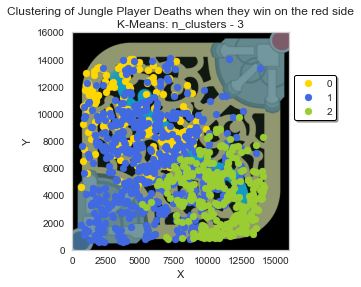

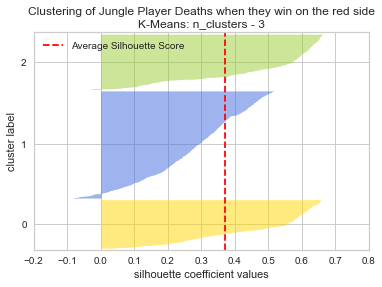

Silhouette score: 0.37165985288998366
1    569
2    292
0    257
Name: cluster, dtype: int64

Inertia: 470.5740120566184

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,5115.482490,9339.424125,-1.000000
1,1,6076.657293,6448.427065,0.267135
2,2,10647.688356,4052.962329,-0.945205


In [23]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "royalblue", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "on the red side", kmeans, cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

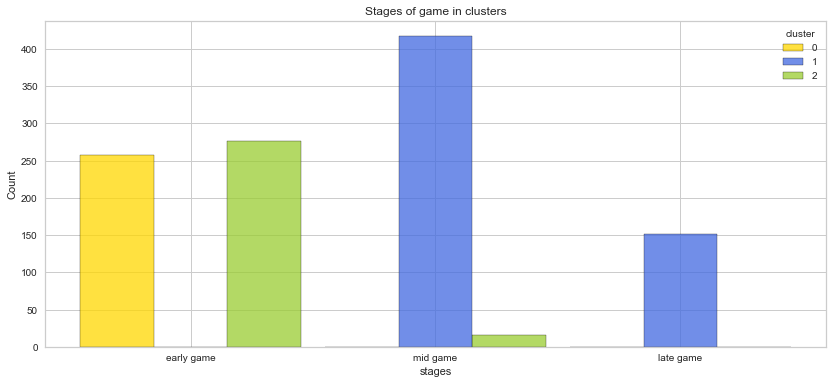

In [24]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 4

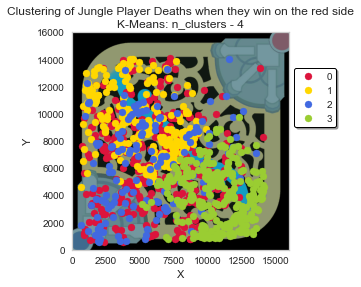

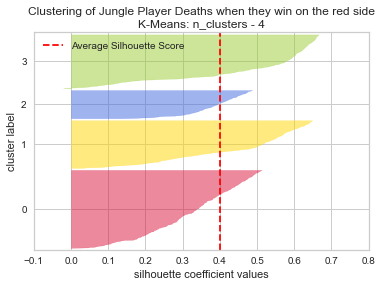

Silhouette score: 0.40077877788010413
0    420
3    289
1    257
2    152
Name: cluster, dtype: int64

Inertia: 357.6999799342705

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,6293.257143,6542.342857,0.000000
1,1,5115.482490,9339.424125,-1.000000
2,2,5616.664474,6175.381579,1.000000
3,3,10622.290657,4035.217993,-0.955017


In [25]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "gold", "royalblue", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "on the red side", kmeans, cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

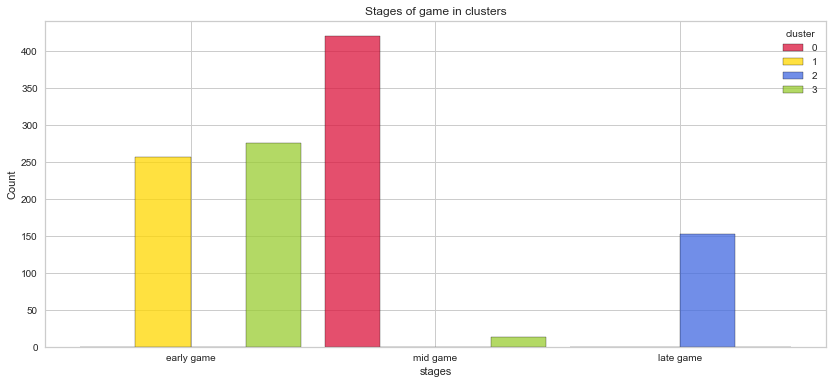

In [26]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 8

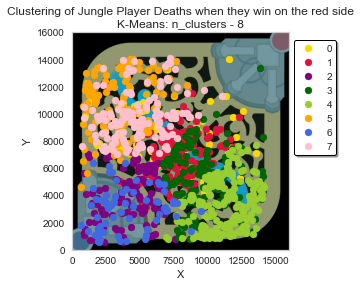

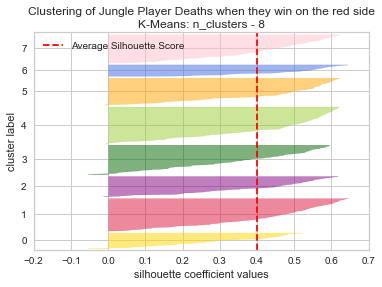

Silhouette score: 0.4004487098824345
4    202
1    181
3    164
7    157
5    150
2    113
0     87
6     64
Name: cluster, dtype: int64

Inertia: 173.95206129582792

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,6593.080460,8481.758621,1.000000
1,1,7735.591160,6867.977901,-1.000000
2,2,4231.212389,3851.185841,0.000000
3,3,9652.457317,5070.402439,0.006098
4,4,11182.732673,3404.346535,-1.000000
5,5,3716.120000,10644.393333,-1.000000
6,6,4158.687500,3073.093750,1.000000
7,7,4866.662420,9707.579618,0.000000


In [27]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "crimson", "purple", "darkgreen", "yellowgreen", "orange", "royalblue", "pink"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "on the red side", kmeans, cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

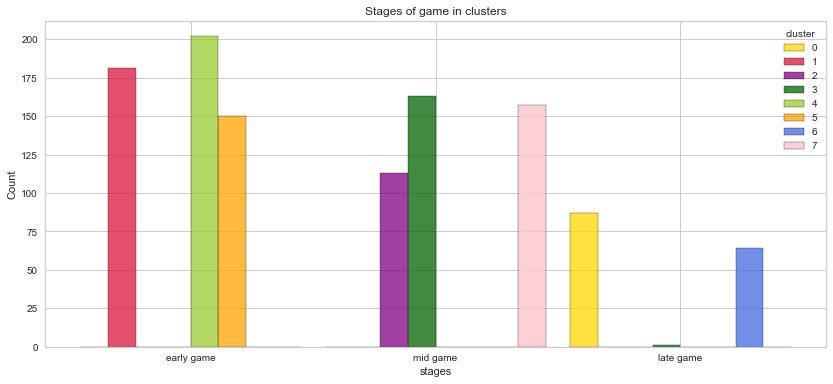

In [28]:
stagesPerClusterV2(redSideVictory_df, colors)

---
### Standard scale

In [29]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [30]:
redSideVictoryDiscretized_df = redSideVictoryDiscretized_df.drop("cluster", axis=1)
redSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
6038,7396.0,6838.0,-1
6041,10140.0,2505.0,-1
6221,4114.0,7822.0,-1
6226,5128.0,3384.0,-1
6253,5090.0,9540.0,0
...,...,...,...
275607,6048.0,5969.0,0
275614,6742.0,4329.0,1
275648,4159.0,10322.0,-1
275750,5575.0,8675.0,-1


Normalize Data

In [31]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
6038,0.103240,0.106336,-1
6041,0.920986,-1.207649,-1
6221,-0.874837,0.404735,-1
6226,-0.572653,-0.941092,-1
6253,-0.583977,0.925720,0
...,...,...,...
275607,-0.298481,-0.157189,0
275614,-0.091660,-0.654520,1
275648,-0.861427,1.162862,-1
275750,-0.439441,0.663408,-1


Best k values

In [32]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df, kmeans.labels_)))

Silhouette score for k=2: 0.32948405935919933
Silhouette score for k=3: 0.33942166528478546
Silhouette score for k=4: 0.3044351398210776
Silhouette score for k=5: 0.3069627936355724
Silhouette score for k=6: 0.3218922443520196
Silhouette score for k=7: 0.3262876051253352
Silhouette score for k=8: 0.31021797084625197
Silhouette score for k=9: 0.31548174115680466
Silhouette score for k=10: 0.30995661786439055
Silhouette score for k=11: 0.3106946248097535
Silhouette score for k=12: 0.3202319631888625
Silhouette score for k=13: 0.3220740260228609
Silhouette score for k=14: 0.3311612271594361
Silhouette score for k=15: 0.33821874375602373
Silhouette score for k=16: 0.3438826651191942
Silhouette score for k=17: 0.3515640540174496
Silhouette score for k=18: 0.3469039244614479
Silhouette score for k=19: 0.354091566129313
Silhouette score for k=20: 0.3532246271368863
Silhouette score for k=25: 0.35454461341000537


K-Means with k = 7

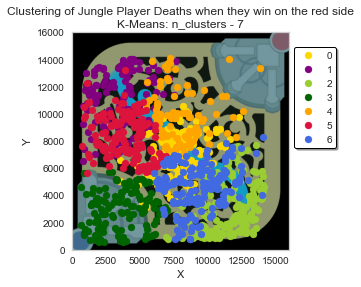

/home/bambito9/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/home/bambito9/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


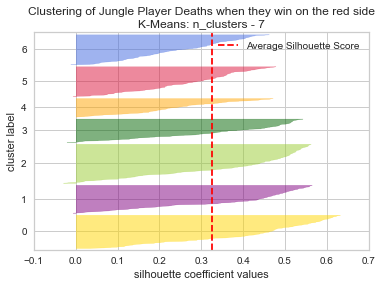

Silhouette score: 0.3262876051253352
2    216
0    184
6    166
5    165
1    155
3    129
4    103
Name: cluster, dtype: int64

Inertia: 681.7408759701839

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,7631.798913,6873.532609,-1.000000
1,1,3682.864516,10954.522581,-0.916129
2,2,11290.726852,3399.027778,-0.939815
3,3,3667.255814,2957.992248,0.403101
4,4,7959.378641,9852.563107,0.194175
5,5,3942.145455,8384.836364,0.309091
6,6,9181.831325,4675.228916,0.150602


In [33]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "purple", "yellowgreen", "darkgreen", "orange", "crimson", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "on the red side", kmeans, cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

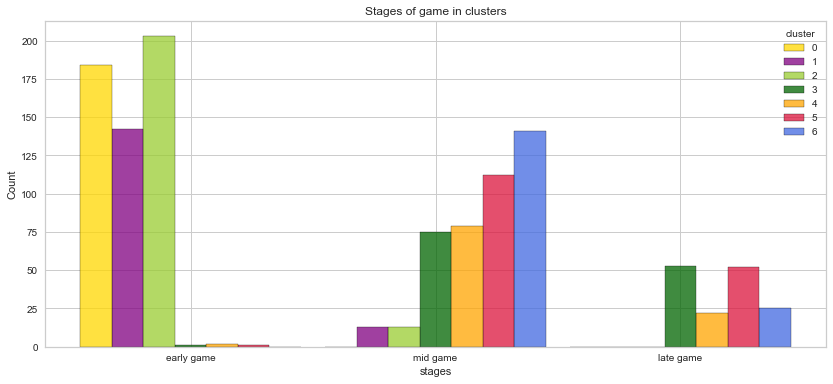

In [34]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 3

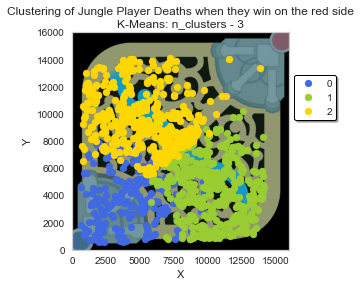

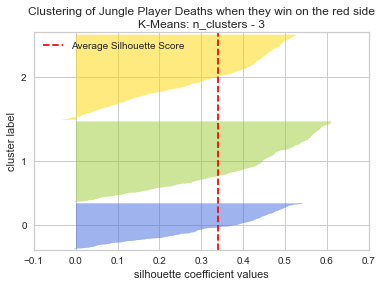

Silhouette score: 0.33942166528478546
2    452
1    426
0    240
Name: cluster, dtype: int64

Inertia: 1247.940590046105

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4702.370833,4187.008333,0.383333
1,1,10347.089202,4420.906103,-0.666667
2,2,5188.037611,9656.336283,-0.418142


In [37]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "yellowgreen", "gold"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "on the red side", kmeans, cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

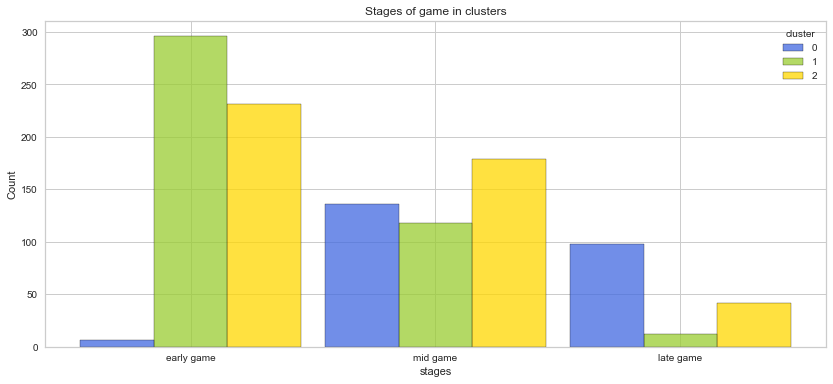

In [29]:
stagesPerClusterV2(redSideVictory_df, colors)

---
### Clustering Red Team Defeat

In [30]:
redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275670,KR_6375903925,Red,anonymous 48,kr,Elise,4.274650,7985.0,3502.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275702,KR_6375903925,Red,anonymous 48,kr,Elise,20.639133,4859.0,10824.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [31]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

,coordinate_x,coordinate_y,timestamp
5915,8286.0,7654.0,5.672050
5938,10048.0,8002.0,17.020000
5946,6100.0,11267.0,21.701117
5951,9475.0,8919.0,23.496983
5958,11804.0,13243.0,27.062767
...,...,...,...
275670,7985.0,3502.0,4.274650
275702,4859.0,10824.0,20.639133
275711,1722.0,9788.0,26.279650
275716,3384.0,11610.0,29.629633


In [78]:
redSideDefeat_df[redSideDefeat_df["timestamp"] > 25]

,coordinate_x,coordinate_y,timestamp
5958,11804.0,13243.0,27.062767
6020,7145.0,4910.0,27.612450
6024,8265.0,7572.0,29.116733
6343,10109.0,7512.0,27.657383
6355,3256.0,4266.0,31.948067
...,...,...,...
274397,9040.0,9300.0,27.498800
274901,5358.0,10674.0,27.431450
275711,1722.0,9788.0,26.279650
275716,3384.0,11610.0,29.629633


Time discretization

In [32]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [33]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

In [34]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

Normalize Data

In [35]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
5915,-0.006686,-0.040794,-1
5938,0.526541,0.059988,0
5946,-0.668226,1.005547,0
5951,0.353136,0.325556,0
5958,1.057952,1.577805,1
...,...,...,...
275670,-0.097776,-1.243231,-1
275702,-1.043784,0.877252,0
275711,-1.993122,0.577222,1
275716,-1.490158,1.104881,1


K-Means with k = 3

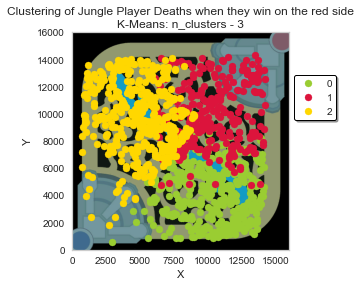

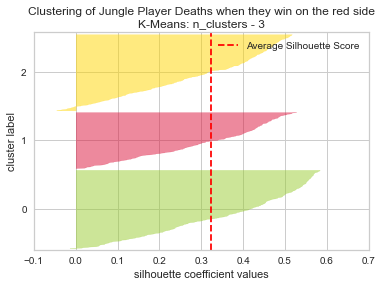

Silhouette score: 0.32323164319350406
0    462
2    449
1    330
Name: cluster, dtype: int64

Inertia: 1446.0400996615365

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10243.428571,4370.021645,-0.638528
1,1,10244.039394,9877.663636,0.403030
2,2,4893.866370,9788.069042,-0.358575


In [37]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "crimson", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "on the red side", kmeans, cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

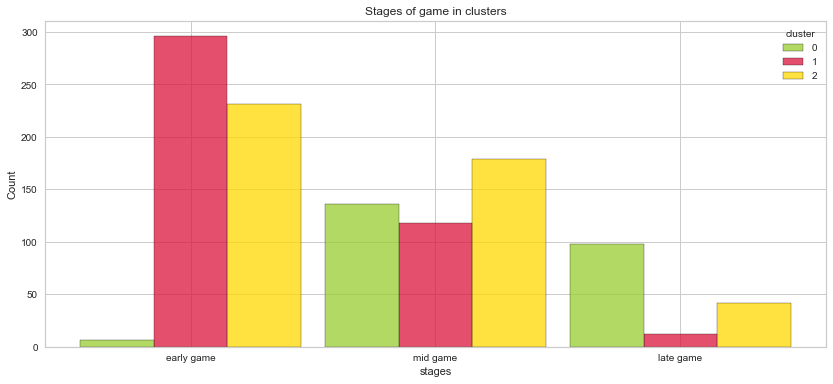

In [38]:
stagesPerClusterV2(redSideVictory_df, colors)

---
### Amateur Players - Gold Division

In [39]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Amateur/FinalAmateurPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role,rank
0,EUW1_6274275803,Blue,anonymous 125,euw1,Twitch,0.000000,329.0,650.0,1.0,0.0,...,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY,Platinum
1,EUW1_6274275803,Blue,anonymous 125,euw1,Twitch,1.000200,6569.0,11391.0,1.0,0.0,...,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY,Platinum
2,EUW1_6274275803,Blue,anonymous 125,euw1,Twitch,0.495733,NaN,NaN,NaN,NaN,...,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,UTILITY,Platinum
3,EUW1_6274275803,Blue,anonymous 125,euw1,Twitch,2.000517,4320.0,12059.0,1.0,0.0,...,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,UTILITY,Platinum
4,EUW1_6274275803,Blue,anonymous 125,euw1,Twitch,1.979017,4245.0,13217.0,NaN,NaN,...,NaN,False,Assist,NaN,NaN,NaN,NaN,NaN,UTILITY,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838676,EUW1_6283483863,Red,anonymous 56,euw1,Annie,17.139450,NaN,NaN,NaN,NaN,...,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Kindlegem,UTILITY,Gold
838677,EUW1_6283483863,Red,anonymous 56,euw1,Annie,22.688683,NaN,NaN,NaN,NaN,...,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Knight's Vow,UTILITY,Gold
838678,EUW1_6283483863,Red,anonymous 56,euw1,Annie,22.826867,NaN,NaN,NaN,NaN,...,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Glacial Buckler,UTILITY,Gold
838679,EUW1_6283483863,Red,anonymous 56,euw1,Annie,25.901700,NaN,NaN,NaN,NaN,...,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Kindlegem,UTILITY,Gold


In [40]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]
jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role,rank
2889,EUW1_6274465314,Red,anonymous 129,euw1,Maokai,11.513217,6641.0,7209.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2920,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,8.982983,7920.0,7566.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2934,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,16.199850,7563.0,14015.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2940,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,19.408433,9840.0,5767.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2945,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,20.767800,9324.0,3640.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639069,EUW1_6289927839,Blue,anonymous 129,euw1,Elise,13.741617,10721.0,4858.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
639073,EUW1_6289927839,Blue,anonymous 129,euw1,Elise,15.681267,9404.0,2395.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
639096,EUW1_6289927839,Blue,anonymous 129,euw1,Elise,25.144567,13636.0,8165.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
639168,EUW1_6289902488,Blue,anonymous 129,euw1,Maokai,22.222133,6206.0,10446.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold


In [41]:
blueSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
blueSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role,rank
3383,EUW1_6272896782,Blue,anonymous 129,euw1,LeeSin,6.302467,7678.0,7550.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
3396,EUW1_6272896782,Blue,anonymous 129,euw1,LeeSin,13.837467,4684.0,8960.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
3406,EUW1_6272896782,Blue,anonymous 129,euw1,LeeSin,18.453517,7188.0,11508.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
3417,EUW1_6272896782,Blue,anonymous 129,euw1,LeeSin,22.972600,6200.0,10302.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
3425,EUW1_6272896782,Blue,anonymous 129,euw1,LeeSin,26.447450,7050.0,3032.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639065,EUW1_6289927839,Blue,anonymous 129,euw1,Elise,11.995317,796.0,10384.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
639069,EUW1_6289927839,Blue,anonymous 129,euw1,Elise,13.741617,10721.0,4858.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
639073,EUW1_6289927839,Blue,anonymous 129,euw1,Elise,15.681267,9404.0,2395.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
639096,EUW1_6289927839,Blue,anonymous 129,euw1,Elise,25.144567,13636.0,8165.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold


In [42]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role,rank
2889,EUW1_6274465314,Red,anonymous 129,euw1,Maokai,11.513217,6641.0,7209.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2920,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,8.982983,7920.0,7566.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2934,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,16.199850,7563.0,14015.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2940,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,19.408433,9840.0,5767.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
2945,EUW1_6274421335,Red,anonymous 129,euw1,MonkeyKing,20.767800,9324.0,3640.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618703,EUW1_6287503036,Red,anonymous 172,euw1,Singed,37.131050,4968.0,9572.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
618744,EUW1_6287888157,Red,anonymous 173,euw1,Evelynn,22.854233,11768.0,3484.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
618749,EUW1_6287888157,Red,anonymous 173,euw1,Evelynn,26.166817,10533.0,9783.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
618753,EUW1_6287888157,Red,anonymous 173,euw1,Evelynn,28.940083,7887.0,13567.0,NaN,NaN,...,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold


##### Clustering Red Team Victory

In [59]:
redSideVictory_df = redSide_jungler_deaths_df[redSide_jungler_deaths_df["victory"] == True]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role,rank
3060,EUW1_6273443622,Red,anonymous 129,euw1,Elise,10.137967,8142.0,6348.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
3165,EUW1_6273309297,Red,anonymous 129,euw1,Maokai,2.194633,7580.0,11652.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
3167,EUW1_6273309297,Red,anonymous 129,euw1,Maokai,3.906483,1263.0,9658.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
3169,EUW1_6273309297,Red,anonymous 129,euw1,Maokai,4.678950,10423.0,7698.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
3188,EUW1_6273309297,Red,anonymous 129,euw1,Maokai,13.063800,7051.0,7059.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618242,EUW1_6287566776,Red,anonymous 172,euw1,Singed,8.078050,8985.0,9907.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
618292,EUW1_6287566776,Red,anonymous 172,euw1,Singed,30.481917,7334.0,10446.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
618296,EUW1_6287566776,Red,anonymous 172,euw1,Singed,32.250800,7102.0,9438.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
618309,EUW1_6287566776,Red,anonymous 172,euw1,Singed,36.937917,7009.0,1340.0,NaN,NaN,...,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold


In [60]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
3060,8142.0,6348.0,10.137967
3165,7580.0,11652.0,2.194633
3167,1263.0,9658.0,3.906483
3169,10423.0,7698.0,4.678950
3188,7051.0,7059.0,13.063800
...,...,...,...
618242,8985.0,9907.0,8.078050
618292,7334.0,10446.0,30.481917
618296,7102.0,9438.0,32.250800
618309,7009.0,1340.0,36.937917


Time discretization

In [61]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [62]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [63]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

In [64]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

Normalize Data

In [65]:
# Normalize x and y coordinates to [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
redSideVictoryDiscretized_df[['coordinate_x', 'coordinate_y']] = scaler.fit_transform(redSideVictory_df[['coordinate_x', 'coordinate_y']])

In [66]:
redSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
3060,0.131457,-0.153271,-1
3165,0.042820,0.672897,-1
3167,-0.953474,0.362305,-1
3169,0.491207,0.057009,-1
3188,-0.040612,-0.042523,-1
...,...,...,...
618242,0.264411,0.401090,-1
618292,0.004022,0.485047,1
618296,-0.032568,0.328037,1
618309,-0.047236,-0.933333,1


Best k values

In [24]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.38553901330487667
Silhouette score for k=3: 0.3752075178878799
Silhouette score for k=4: 0.39886744403589913
Silhouette score for k=5: 0.38097025902472126
Silhouette score for k=6: 0.42382361023146586
Silhouette score for k=7: 0.4424663629715548
Silhouette score for k=8: 0.4420434624477897
Silhouette score for k=9: 0.4300280386752291
Silhouette score for k=10: 0.4168233246304144
Silhouette score for k=11: 0.4301311028403925
Silhouette score for k=12: 0.39711216385961007
Silhouette score for k=13: 0.43261296822118195
Silhouette score for k=14: 0.40837848877457344
Silhouette score for k=15: 0.4231655412767441
Silhouette score for k=16: 0.463068159723849
Silhouette score for k=17: 0.42134957732910083
Silhouette score for k=18: 0.4382451585188582
Silhouette score for k=19: 0.4465249041427872
Silhouette score for k=20: 0.43836012309602235
Silhouette score for k=25: 0.45195027394828796


K-Means with k = 3

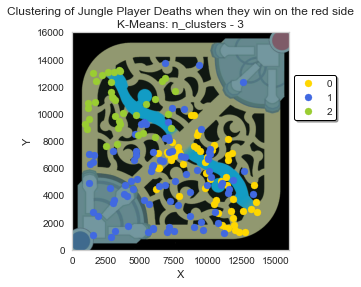

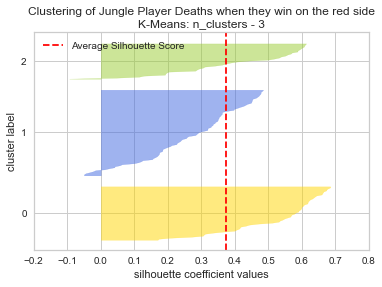

Silhouette score: 0.3752075178878799
1    86
0    54
2    36
Name: cluster, dtype: int64

Inertia: 81.39549900556796

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,9976.074074,5399.148148,-1.000000
1,1,6842.976744,5431.220930,0.337209
2,2,3651.777778,10666.083333,-0.750000


In [67]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "royalblue", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "on the red side", kmeans, cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

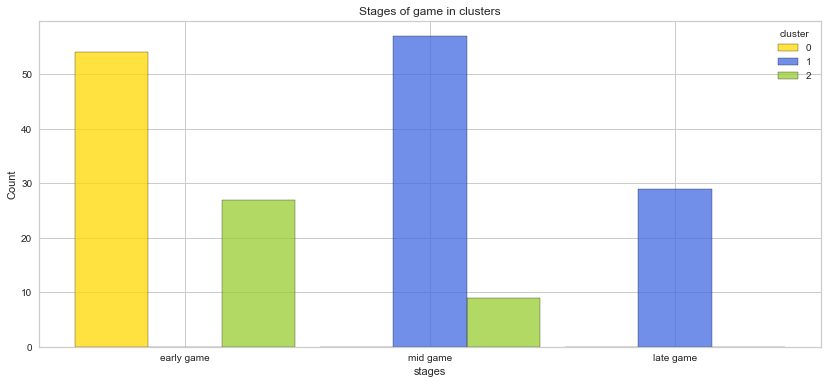

In [68]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 4

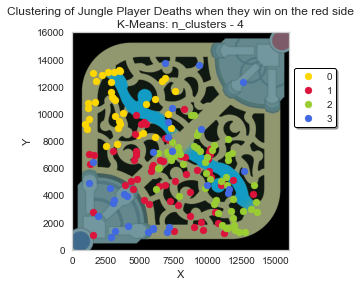

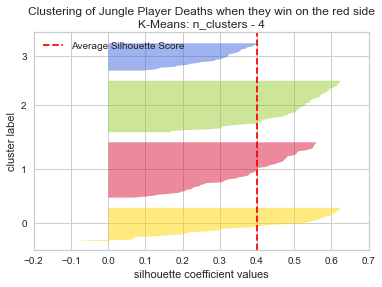

Silhouette score: 0.39886744403589913
1    58
2    54
0    35
3    29
Name: cluster, dtype: int64

Inertia: 61.811203123491964

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,3620.514286,10687.714286,-0.771429
1,1,7088.517241,5540.620690,0.000000
2,2,9976.074074,5399.148148,-1.000000
3,3,6279.586207,5366.827586,1.000000


In [72]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "crimson", "yellowgreen", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "on the red side", kmeans, cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

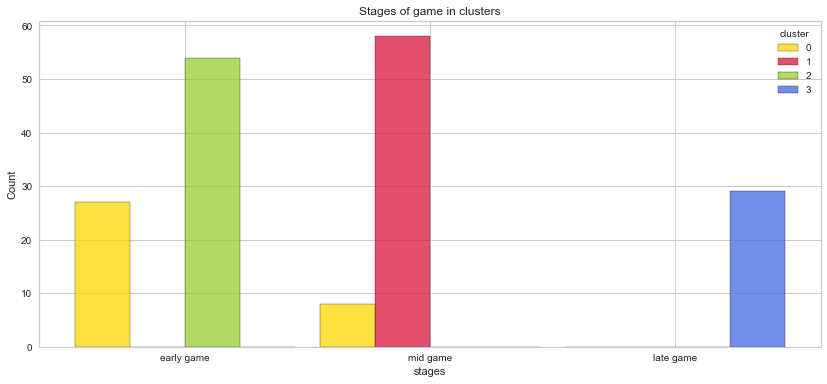

In [73]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 7

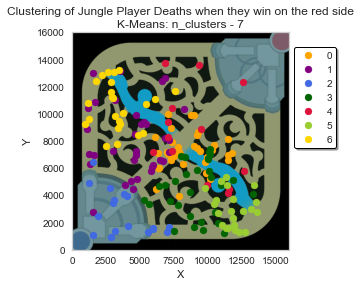

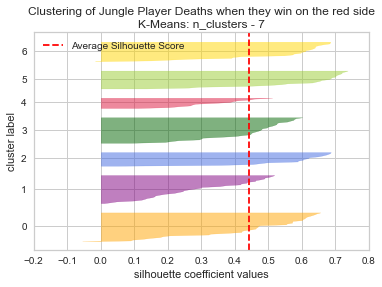

Silhouette score: 0.4424663629715548
0    35
1    34
3    31
6    24
5    22
2    17
4    13
Name: cluster, dtype: int64

Inertia: 30.857581126344964

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,8552.171429,7219.828571,-1.000000
1,1,4445.470588,8077.235294,0.000000
2,2,3814.117647,2720.764706,0.941176
3,3,9160.935484,4453.387097,0.000000
4,4,9139.230769,8499.692308,1.000000
5,5,11810.090909,3006.909091,-1.000000
6,6,3363.958333,10597.583333,-1.000000


In [75]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["orange", "purple", "royalblue", "darkgreen", "crimson", "yellowgreen", "gold"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "on the red side", kmeans, cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

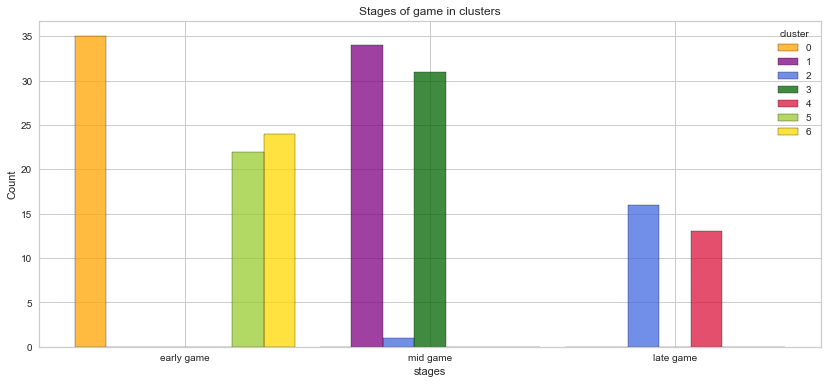

In [76]:
stagesPerClusterV2(redSideVictory_df, colors)

---
Standard scale

In [49]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [34]:
redSideVictoryDiscretized_df = redSideVictoryDiscretized_df.drop("cluster", axis=1)
redSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
3060,8142.0,6348.0,-1
3165,7580.0,11652.0,-1
3167,1263.0,9658.0,-1
3169,10423.0,7698.0,-1
3188,7051.0,7059.0,-1
...,...,...,...
618242,8985.0,9907.0,-1
618292,7334.0,10446.0,1
618296,7102.0,9438.0,1
618309,7009.0,1340.0,1


Normalize Data

In [50]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
3060,0.290354,-0.044160,-1
3165,0.125606,1.580739,-1
3167,-1.726196,0.969870,-1
3169,0.959020,0.369417,-1
3188,-0.029468,0.173657,-1
...,...,...,...
618242,0.537476,1.046152,-1
618292,0.053492,1.211276,1
618296,-0.014517,0.902472,1
618309,-0.041780,-1.578378,1


Best k values

In [51]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df, kmeans.labels_)))

Silhouette score for k=2: 0.3227646103825504
Silhouette score for k=3: 0.32323164319350406
Silhouette score for k=4: 0.3045237971505331
Silhouette score for k=5: 0.31157759986583405
Silhouette score for k=6: 0.31487939078258215
Silhouette score for k=7: 0.32073542869752936
Silhouette score for k=8: 0.3152164526269498
Silhouette score for k=9: 0.30042089772768354
Silhouette score for k=10: 0.31208310029027597
Silhouette score for k=11: 0.3033412574295544
Silhouette score for k=12: 0.3165464380607133
Silhouette score for k=13: 0.31800477109118996
Silhouette score for k=14: 0.3201833133266136
Silhouette score for k=15: 0.3278493003934346
Silhouette score for k=16: 0.3309472495330281
Silhouette score for k=17: 0.33684829907168623
Silhouette score for k=18: 0.33761184715458964
Silhouette score for k=19: 0.3457368984627025
Silhouette score for k=20: 0.3389592339068679
Silhouette score for k=25: 0.3549451409941994


K-Means with k = 3

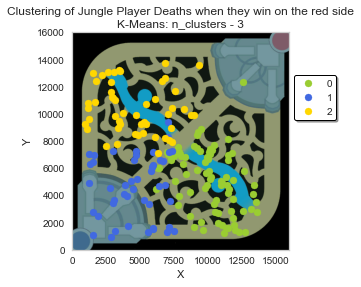

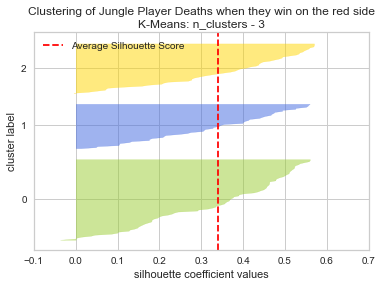

Silhouette score: 0.340689888275204
0    81
2    50
1    45
Name: cluster, dtype: int64

Inertia: 198.99981198535644

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10125.296296,5107.370370,-0.543210
1,1,4654.977778,4646.955556,0.444444
2,2,4580.900000,10396.160000,-0.560000


In [54]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "royalblue", "gold"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "on the red side", kmeans, cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

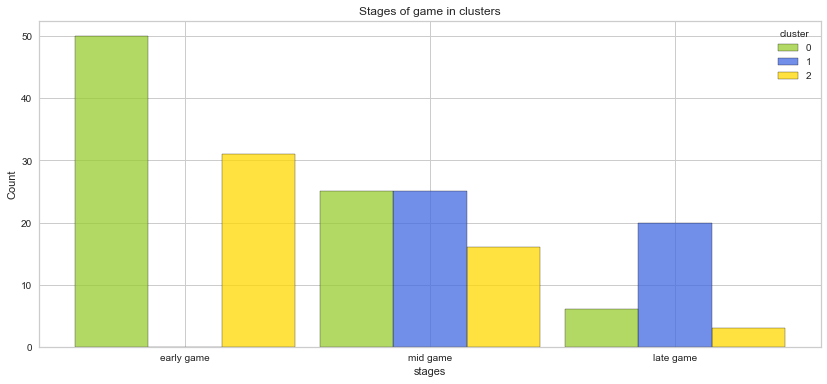

In [55]:
stagesPerClusterV2(redSideVictory_df, colors)

K-Means with k = 7

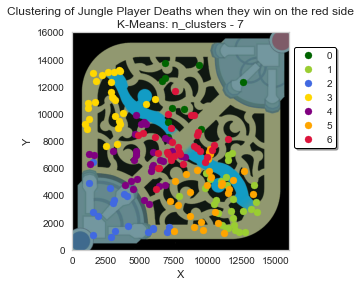

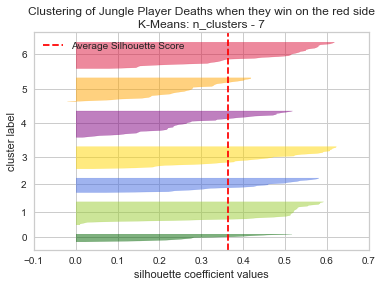

Silhouette score: 0.36308002418851704
6    32
4    32
5    29
1    28
3    27
2    18
0    10
Name: cluster, dtype: int64

Inertia: 94.31476795975345

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,8149.200000,11217.300000,0.700000
1,1,11516.928571,3630.714286,-1.000000
2,2,3688.222222,2725.833333,0.888889
3,3,2786.037037,10853.481481,-0.777778
4,4,5301.343750,6679.656250,0.062500
5,5,9969.965517,4381.758621,0.137931
6,6,7947.468750,7683.000000,-1.000000


In [57]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["darkgreen", "yellowgreen", "royalblue", "gold", "purple", "orange", "crimson"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "on the red side", kmeans, cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

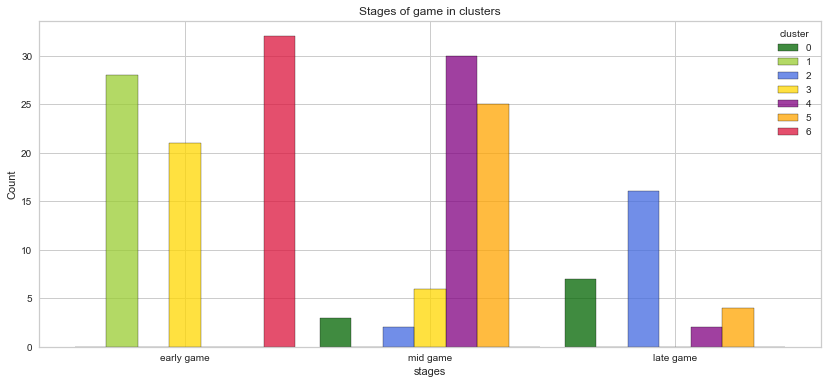

In [58]:
stagesPerClusterV2(redSideVictory_df, colors)